In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
priceL = 180
priceH = 300
pL = [0.3,0.7] # demand probabilities for low price
pH = [0.6,0.4] # demand probabilities for high price

delta = 0.98 # discount rate

M = 100 # number of seats on plane
T = 365 # days until takeoff

sValues = np.arange(M+1) # all possible number of seats left
tValues = np.arange(T+1) # all possible days until takeoff
sN = len(sValues) # count possible state values
tN = len(tValues)

In [11]:
V = np.zeros((sN,tN)) # initialize value function
U = np.zeros((sN,tN)) # initialize optimal choice variable

# boundary/terminal condition
V[:,tN-1] = 0 # when the flight takes off you can't make any more money
U[:,tN-1] = 0 # 0 is the value for no tickets for sale


In [12]:
for t in reversed(range(tN-1)):
    for s in range(sN):
        if s==0: # is the flight full (0 seats left)
            V[s,t]=0 # if so, you can't make any more money
            U[s,t]=3 # no tickets for sale
        else:
            # value if you set the price low
            # expected revenue from low price + discounted expected value function next time
            valueL = pL[1]*priceL + delta* (pL[0]*V[s,t+1] + pL[1]*V[s-1,t+1])
            # expected revenue from low price
            valueH = pH[1]*priceH + delta* (pH[0]*V[s,t+1] + pH[1]*V[s-1,t+1]) 

            V[s,t]=max(valueL,valueH) # value funciton maximizes expected revenue
            U[s,t]=np.argmax([valueL,valueH])+1 # choice of price: 1 means low price, 2 means high price
            # I'm adding the +1 here to make life easier later

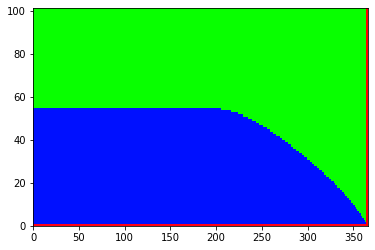

In [13]:
plt.pcolor( U , cmap = 'hsv' );

In [6]:
s = sN-1 # on the first day all seats are available
total_rev = 0 # we haven't made any money yet
seats_left_vec = np.zeros(tN-1) # store how many seats
revenue_vec = np.zeros(tN-1)
price_vec = np.zeros(tN-1)
for t in range(tN-1): # loop forward in time...don't need last time period since we can't sell anything then
    opt_price = U[s,t] # how much should we charge
    price_vec[t] = opt_price
    if opt_price == 1: # low price
        prob_sale = pL[1] # for each value of U find probability of making a sale
        actual_price = priceL # for each value find actual sale price
    elif opt_price == 2: # high price
        prob_sale = pH[1]
        actual_price = priceH
    else: # no tickets for sale
        prob_sale = 0
        actual_price = 0

    sale = (np.random.random(1)<prob_sale) # simulate whether a sale was made or not
    # when the flight is full the probability of sale is 0, we'll never get a sale
    s = int(s - sale) # subtract whether or not a sale was made
    total_rev = total_rev + sale*actual_price*delta**(t-1) # add discounted revenue
    # save the results
    seats_left_vec[t] = s 
    revenue_vec[t] = total_rev

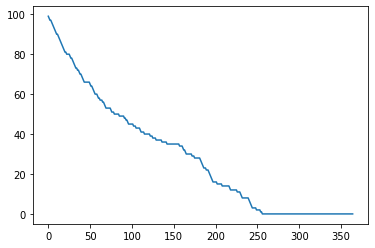

In [7]:
plt.plot(tValues[:-1],seats_left_vec);

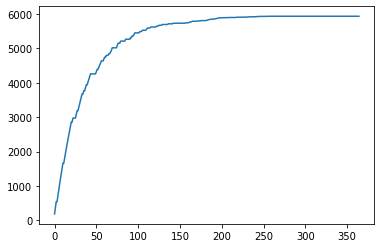

In [8]:
plt.plot(tValues[:-1],revenue_vec);